# Домашнее задание №2. Дескриптивный анализ данных

**Цель работы**: приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python

## Вариант

In [373]:
surname = "Вохрамеев"

if not surname:
    raise Exception('Необходимо указать фамилию!')

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
VARIANT =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1 - вариант: ", VARIANT % 5 + 1)
print("задача № 2 - вариант: ", VARIANT % 4 + 1)

Задача № 1 - вариант:  2
задача № 2 - вариант:  4


# Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)

In [374]:
import pandas as pd
import matplotlib.pyplot as plt

### 1) Загрузим данные в DataFrame и сохраним в DF_WGI

In [375]:
DF_WGI = pd.read_excel("data/wgidataset.xlsx", sheet_name="ControlofCorruption", header=[13,14]) # Читаем таблицу в датафрейм

### 2) Отсортируем данные по убыванию индекса DataFrame и сохраним в DF_SORTED

In [376]:
DF_SORTED = DF_WGI.sort_index(ascending=0)
DF_SORTED

Basic           1996                                         \
    Country/Territory Code  Estimate    StdErr NumSrc       Rank      Lower   
213          Zimbabwe  ZWE -0.278847  0.244907    5.0  47.849461  30.645161   
212            Zambia  ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
211  Congo, Dem. Rep.  ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
210      South Africa  ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
209            Serbia  SRB -1.140072  0.262077    4.0  11.827957   0.537634   
..                ...  ...       ...       ...    ...        ...        ...   
4            Anguilla  AIA       NaN       NaN    NaN        NaN        NaN   
3              Angola  AGO -1.167702  0.262077    4.0   9.677420   0.537634   
2         Afghanistan  AFG -1.291705  0.340507    2.0   4.301075   0.000000   
1             Andorra  ADO  1.318143  0.480889    1.0  87.096771  72.043015   
0               Aruba  ABW       NaN       NaN    NaN        NaN        NaN   

                    1998            ...   2021                        \
         Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
213  60.752689 -0.504802  0.198134  ...   12.0  10.000000   4.285714   
212  41.397850 -0.853156  0.227055  ...   12.0  25.714285  17.619047   
211  12.365591 -1.416679  0.310343  ...   11.0   4.285714   0.000000   
210  81.182793  0.638809  0.188628  ...   11.0  53.809525  46.190475   
209  29.032259 -1.195605  0.191027  ...    9.0  35.714287  26.190475   
..         ...       ...       ...  ...    ...        ...        ...   
4          NaN       NaN       NaN  ...    1.0  73.333336  50.952381   
3    27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
2    27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
1    96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
0          NaN       NaN       NaN  ...    2.0  78.571426  62.857143   

                    2022                                                    
         Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
213  17.619047 -1.255139  0.151262   12.0   8.490566   4.245283  17.924528  
212  33.809525 -0.529200  0.152557   12.0  34.433964  23.584906  45.754719  
211   6.666667 -1.544474  0.149016   12.0   3.301887   0.471698   7.075472  
210  60.000000 -0.319765  0.157883   11.0  44.811321  31.603773  52.358490  
209  48.095238 -0.456188  0.158030    9.0  35.377357  24.528301  48.113209  
..         ...       ...       ...    ...        ...        ...        ...  
4    89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
3    40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
2    20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
1    96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
0    89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  

[214 rows x 146 columns]

### 3) Отобразим данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика

Отсортируем данные по 2022 году:

In [377]:
DF_SORTED_RANK_2022 = DF_WGI.sort_values(by=(2022, 'Rank'), ascending=1).reset_index(drop=True)

DF_SORTED_RANK_2022[(2022, 'Rank')] = DF_SORTED_RANK_2022[(2022, 'Rank')].replace([float('inf'), float('-inf')], float('nan')) # Заменяем бесконечности на NaN
DF_SORTED_RANK_2022 = DF_SORTED_RANK_2022.dropna(subset=[(2022, 'Rank')]) # Выкидываем NaNы
DF_SORTED_RANK_2022 = DF_SORTED_RANK_2022[DF_SORTED_RANK_2022[(2022, 'Rank')] != 0.0000] # Нулевые значения тоже не нужны

country_ranks = DF_SORTED_RANK_2022.loc[:, (2022, 'Rank')]
country_names = DF_SORTED_RANK_2022.loc[:, ('Basic', 'Country/Territory')]

DF_SORTED_RANK_2022

Basic           1996                               \
        Country/Territory Code  Estimate    StdErr NumSrc        Rank   
1                 Somalia  SOM -1.273832  0.315914    3.0    5.376344   
2    Syrian Arab Republic  SYR -0.881176  0.262077    4.0   19.892473   
3             Yemen, Rep.  YEM -0.743732  0.262077    4.0   27.419355   
4           Venezuela, RB  VEN -0.862947  0.210325    6.0   22.580645   
5        Korea, Dem. Rep.  PRK -1.284347  0.315914    3.0    4.838710   
..                    ...  ...       ...       ...    ...         ...   
208                Norway  NOR  2.138955  0.210325    6.0   98.387100   
209             Singapore  SGP  2.107434  0.188622    7.0   97.311829   
210           New Zealand  NZL  2.110246  0.210325    6.0   97.849464   
211               Finland  FIN  2.206872  0.210325    6.0   99.462364   
212               Denmark  DNK  2.231308  0.210325    6.0  100.000000   

                                1998            ...   2021              \
         Lower       Upper  Estimate    StdErr  ... NumSrc        Rank   
1     0.000000   26.344086 -1.169290  0.310343  ...    8.0    0.952381   
2     3.763441   38.709679 -0.914690  0.227055  ...    6.0    0.476190   
3     8.602151   47.311829 -0.998175  0.227055  ...    8.0    1.428571   
4     7.526882   35.483871 -0.933742  0.188628  ...   11.0    1.904762   
5     0.000000   25.806452 -1.248695  0.310343  ...    5.0    2.380952   
..         ...         ...       ...       ...  ...    ...         ...   
208  93.010750  100.000000  2.162263  0.188628  ...    7.0   98.095238   
209  93.010750  100.000000  2.057286  0.172851  ...   10.0   98.571426   
210  93.010750  100.000000  2.148453  0.188628  ...    8.0   99.047623   
211  93.010750  100.000000  2.199662  0.188628  ...   10.0   99.523811   
212  93.548386  100.000000  2.196661  0.188628  ...   10.0  100.000000   

                                2022                                          \
         Lower       Upper  Estimate    StdErr NumSrc        Rank      Lower   
1     0.000000    4.285714 -1.792455  0.180312    8.0    0.471698   0.000000   
2     0.000000    4.761905 -1.775999  0.192463    6.0    0.943396   0.000000   
3     0.000000    6.190476 -1.679558  0.179638    8.0    1.415094   0.000000   
4     0.000000    6.190476 -1.651137  0.161103   10.0    1.886792   0.000000   
5     0.000000    8.095238 -1.606099  0.205471    5.0    2.358490   0.000000   
..         ...         ...       ...       ...    ...         ...        ...   
208  95.714287  100.000000  2.067760  0.179826    7.0   98.113205  95.283020   
209  96.190475  100.000000  2.094724  0.153310   10.0   98.584908  95.754715   
210  96.190475  100.000000  2.163334  0.172786    8.0   99.056602  95.754715   
211  96.666664  100.000000  2.246978  0.162981   10.0   99.528305  96.698112   
212  97.142860  100.000000  2.402744  0.162981   10.0  100.000000  98.584908   

                 
          Upper  
1      4.245283  
2      4.716981  
3      6.603774  
4      6.603774  
5      8.018867  
..          ...  
208   99.528305  
209   99.528305  
210  100.000000  
211  100.000000  
212  100.000000  

[212 rows x 146 columns]

Построим Barplot:

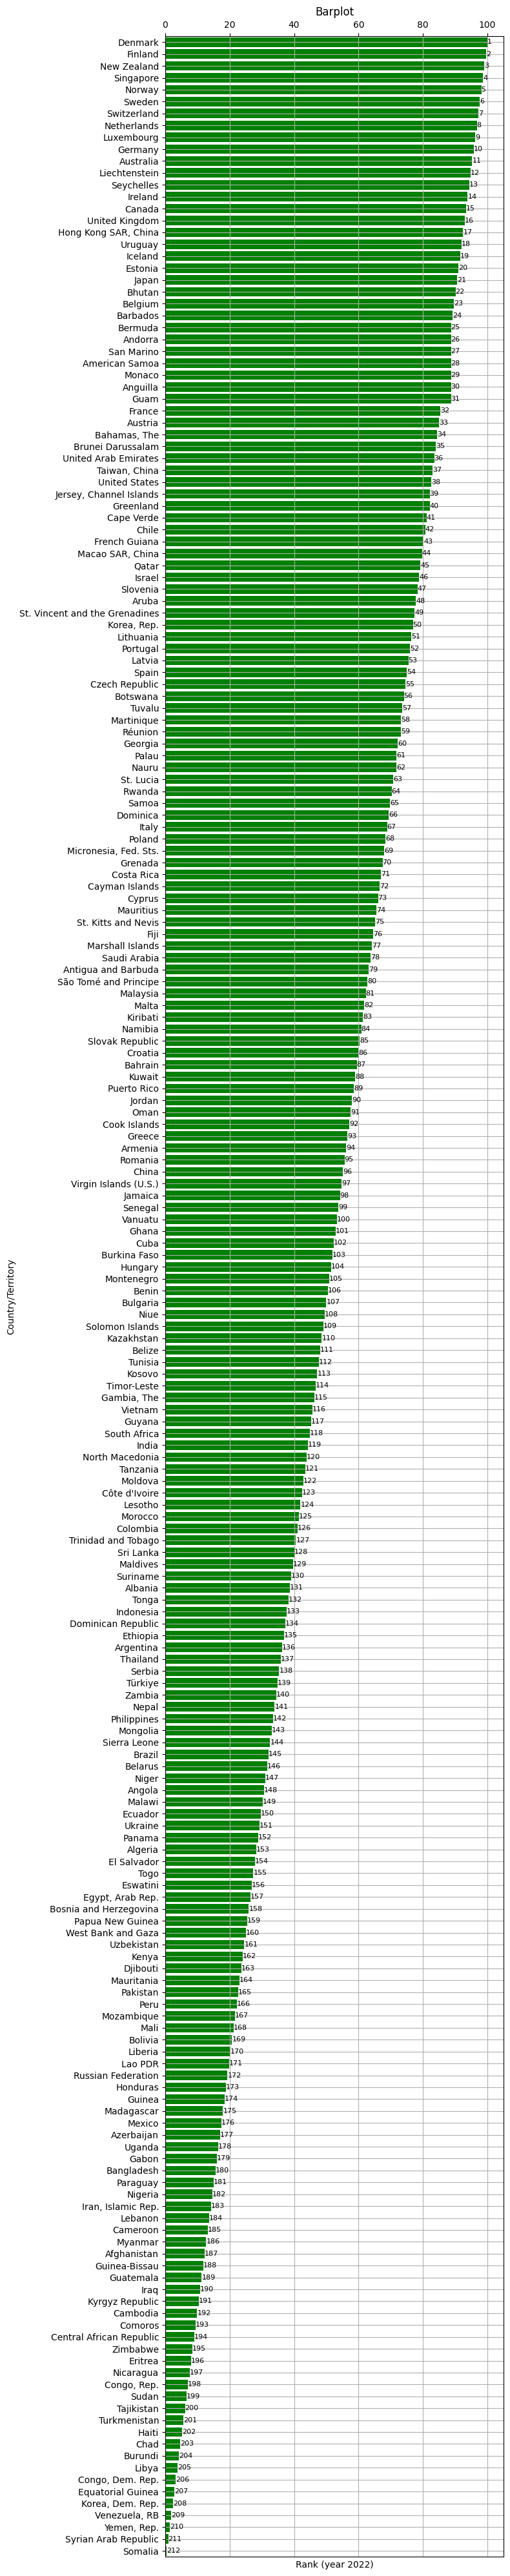

In [378]:
plt.figure(figsize=(8, 40))
plt.gca().xaxis.set_ticks_position('top')                        
ax = plt.subplot(1, 1, 1)    

plt.barh(country_names, country_ranks, color = 'green')
plt.ylabel('Country/Territory')
plt.xlabel('Rank (year 2022)')
plt.title('Barplot')
plt.tight_layout()

ax.set_ylim(-0.5, len(DF_SORTED_RANK_2022.index) - 0.5) # Удаляем лишнее пространство сверху и снизу

for i, (name, rank) in enumerate(zip(country_names, country_ranks)): # Добавляем номера на график
    reverse_index = len(country_ranks) - i
    plt.text(rank, i, f"{reverse_index}", va='center', ha='left', fontsize=8)
    
plt.grid(True)
plt.show()

Страна с самым высоким индексом WGI - Denmark (1 место), а с самым низким - Somalia (212 место)

### 4) Сформируем DataFrame из исходного для региона в соответствии с вариантом и сохраним в DF_REGION

In [379]:
REGIONS_DF = pd.read_excel('data/regions.xlsx') # Читаем данные из таблицы с регионами и добавляем в датафрейм
ame_country_codes = REGIONS_DF.loc[REGIONS_DF['Region'] == 'AME', 'Code']
DF_REGION = DF_WGI[DF_WGI[('Basic', 'Code')].isin(ame_country_codes)] # В этой таблице только страны из нашего региона по вариантам

### 5) Выведем данные DataFrame'a

In [380]:
DF_REGION

Basic           1996                   \
                  Country/Territory Code  Estimate    StdErr NumSrc   
8                         Argentina  ARG -0.101317  0.210325    6.0   
22                     Bahamas, The  BHS  1.156810  0.418145    2.0   
27                          Bolivia  BOL -0.824829  0.262077    4.0   
28                           Brazil  BRA -0.018580  0.210325    6.0   
29                         Barbados  BRB  1.542726  0.340507    2.0   
35                           Canada  CAN  2.031408  0.210325    6.0   
37                            Chile  CHL  1.454119  0.210325    6.0   
43                         Colombia  COL -0.512254  0.210325    6.0   
46                       Costa Rica  CRI  0.696142  0.244907    5.0   
47                             Cuba  CUB  0.289153  0.262077    4.0   
53                         Dominica  DMA  0.869897  0.480889    1.0   
55               Dominican Republic  DOM -0.422995  0.262077    4.0   
57                          Ecuador  ECU -0.684874  0.262077    4.0   
76                          Grenada  GRD  0.869897  0.480889    1.0   
78                        Guatemala  GTM -0.856944  0.244907    5.0   
81                           Guyana  GUY -0.140642  0.315914    3.0   
83                         Honduras  HND -1.078811  0.244907    5.0   
85                            Haiti  HTI -1.173277  0.315914    3.0   
95                          Jamaica  JAM  0.187061  0.262077    4.0   
110                       St. Lucia  LCA       NaN       NaN    NaN   
124                          Mexico  MEX -0.512429  0.210325    6.0   
141                       Nicaragua  NIC -0.564544  0.244907    5.0   
150                          Panama  PAN -0.201106  0.262077    4.0   
152                            Peru  PER -0.398886  0.244907    5.0   
159                        Paraguay  PRY -1.166015  0.262077    4.0   
172                     El Salvador  SLV -0.865278  0.244907    5.0   
176                        Suriname  SUR  0.185647  0.315914    3.0   
190             Trinidad and Tobago  TTO  0.901226  0.262077    4.0   
198                         Uruguay  URY  1.124996  0.262077    4.0   
199                   United States  USA  1.571041  0.210325    6.0   
201  St. Vincent and the Grenadines  VCT       NaN       NaN    NaN   
202                   Venezuela, RB  VEN -0.862947  0.210325    6.0   

                                           1998            ...   2021  \
          Rank      Lower       Upper  Estimate    StdErr  ... NumSrc   
8    53.763439  38.709679   62.903225 -0.203482  0.188628  ...   12.0   
22   83.870964  69.892471   93.010750  1.295374  0.417848  ...    5.0   
27   25.268818   6.451613   41.935482 -0.442392  0.227055  ...   11.0   
28   56.989246  44.086021   63.440861  0.041475  0.188628  ...   12.0   
29   90.860214  81.182793   96.774193  1.541047  0.324013  ...    6.0   
35   96.236557  91.397850  100.000000  2.034210  0.188628  ...    9.0   
37   90.322578  81.182793   93.010750  1.297507  0.188628  ...   12.0   
43   36.559139  23.118280   50.537636 -0.523702  0.188628  ...   12.0   
46   75.268814  63.440861   81.182793  0.756039  0.227055  ...   11.0   
47   63.440861  52.150539   75.806450  0.344617  0.227055  ...    5.0   
53   80.107529  59.139786   91.397850  0.883366  0.453149  ...    3.0   
55   41.397850  23.655914   57.526882 -0.755780  0.227055  ...   11.0   
57   30.107527  12.903226   49.462364 -0.791845  0.227055  ...   10.0   
76   80.107529  59.139786   91.397850  0.883366  0.453149  ...    3.0   
78   23.655914   6.451613   38.709679 -0.866168  0.227055  ...   11.0   
81   52.688171  31.182796   65.053764 -0.352435  0.310343  ...    8.0   
83   14.516129   2.150538   30.645161 -1.015081  0.227055  ...   13.0   
85    9.139785   0.000000   31.182796 -1.166687  0.310343  ...    9.0   
95   61.827957  49.462364   73.118279  0.139226  0.227055  ...    9.0   
110        NaN        NaN         NaN       NaN       NaN  ...    3.0   
124  36.0

### 6) Построим графики индекса WGI за 1996-2022 для стран моего региона

In [381]:
DF_WGI.columns

MultiIndex([('Basic', 'Country/Territory'),
            ('Basic',              'Code'),
            (   1996,          'Estimate'),
            (   1996,            'StdErr'),
            (   1996,            'NumSrc'),
            (   1996,              'Rank'),
            (   1996,             'Lower'),
            (   1996,             'Upper'),
            (   1998,          'Estimate'),
            (   1998,            'StdErr'),
            ...
            (   2021,            'NumSrc'),
            (   2021,              'Rank'),
            (   2021,             'Lower'),
            (   2021,             'Upper'),
            (   2022,          'Estimate'),
            (   2022,            'StdErr'),
            (   2022,            'NumSrc'),
            (   2022,              'Rank'),
            (   2022,             'Lower'),
            (   2022,             'Upper')],
           length=146)

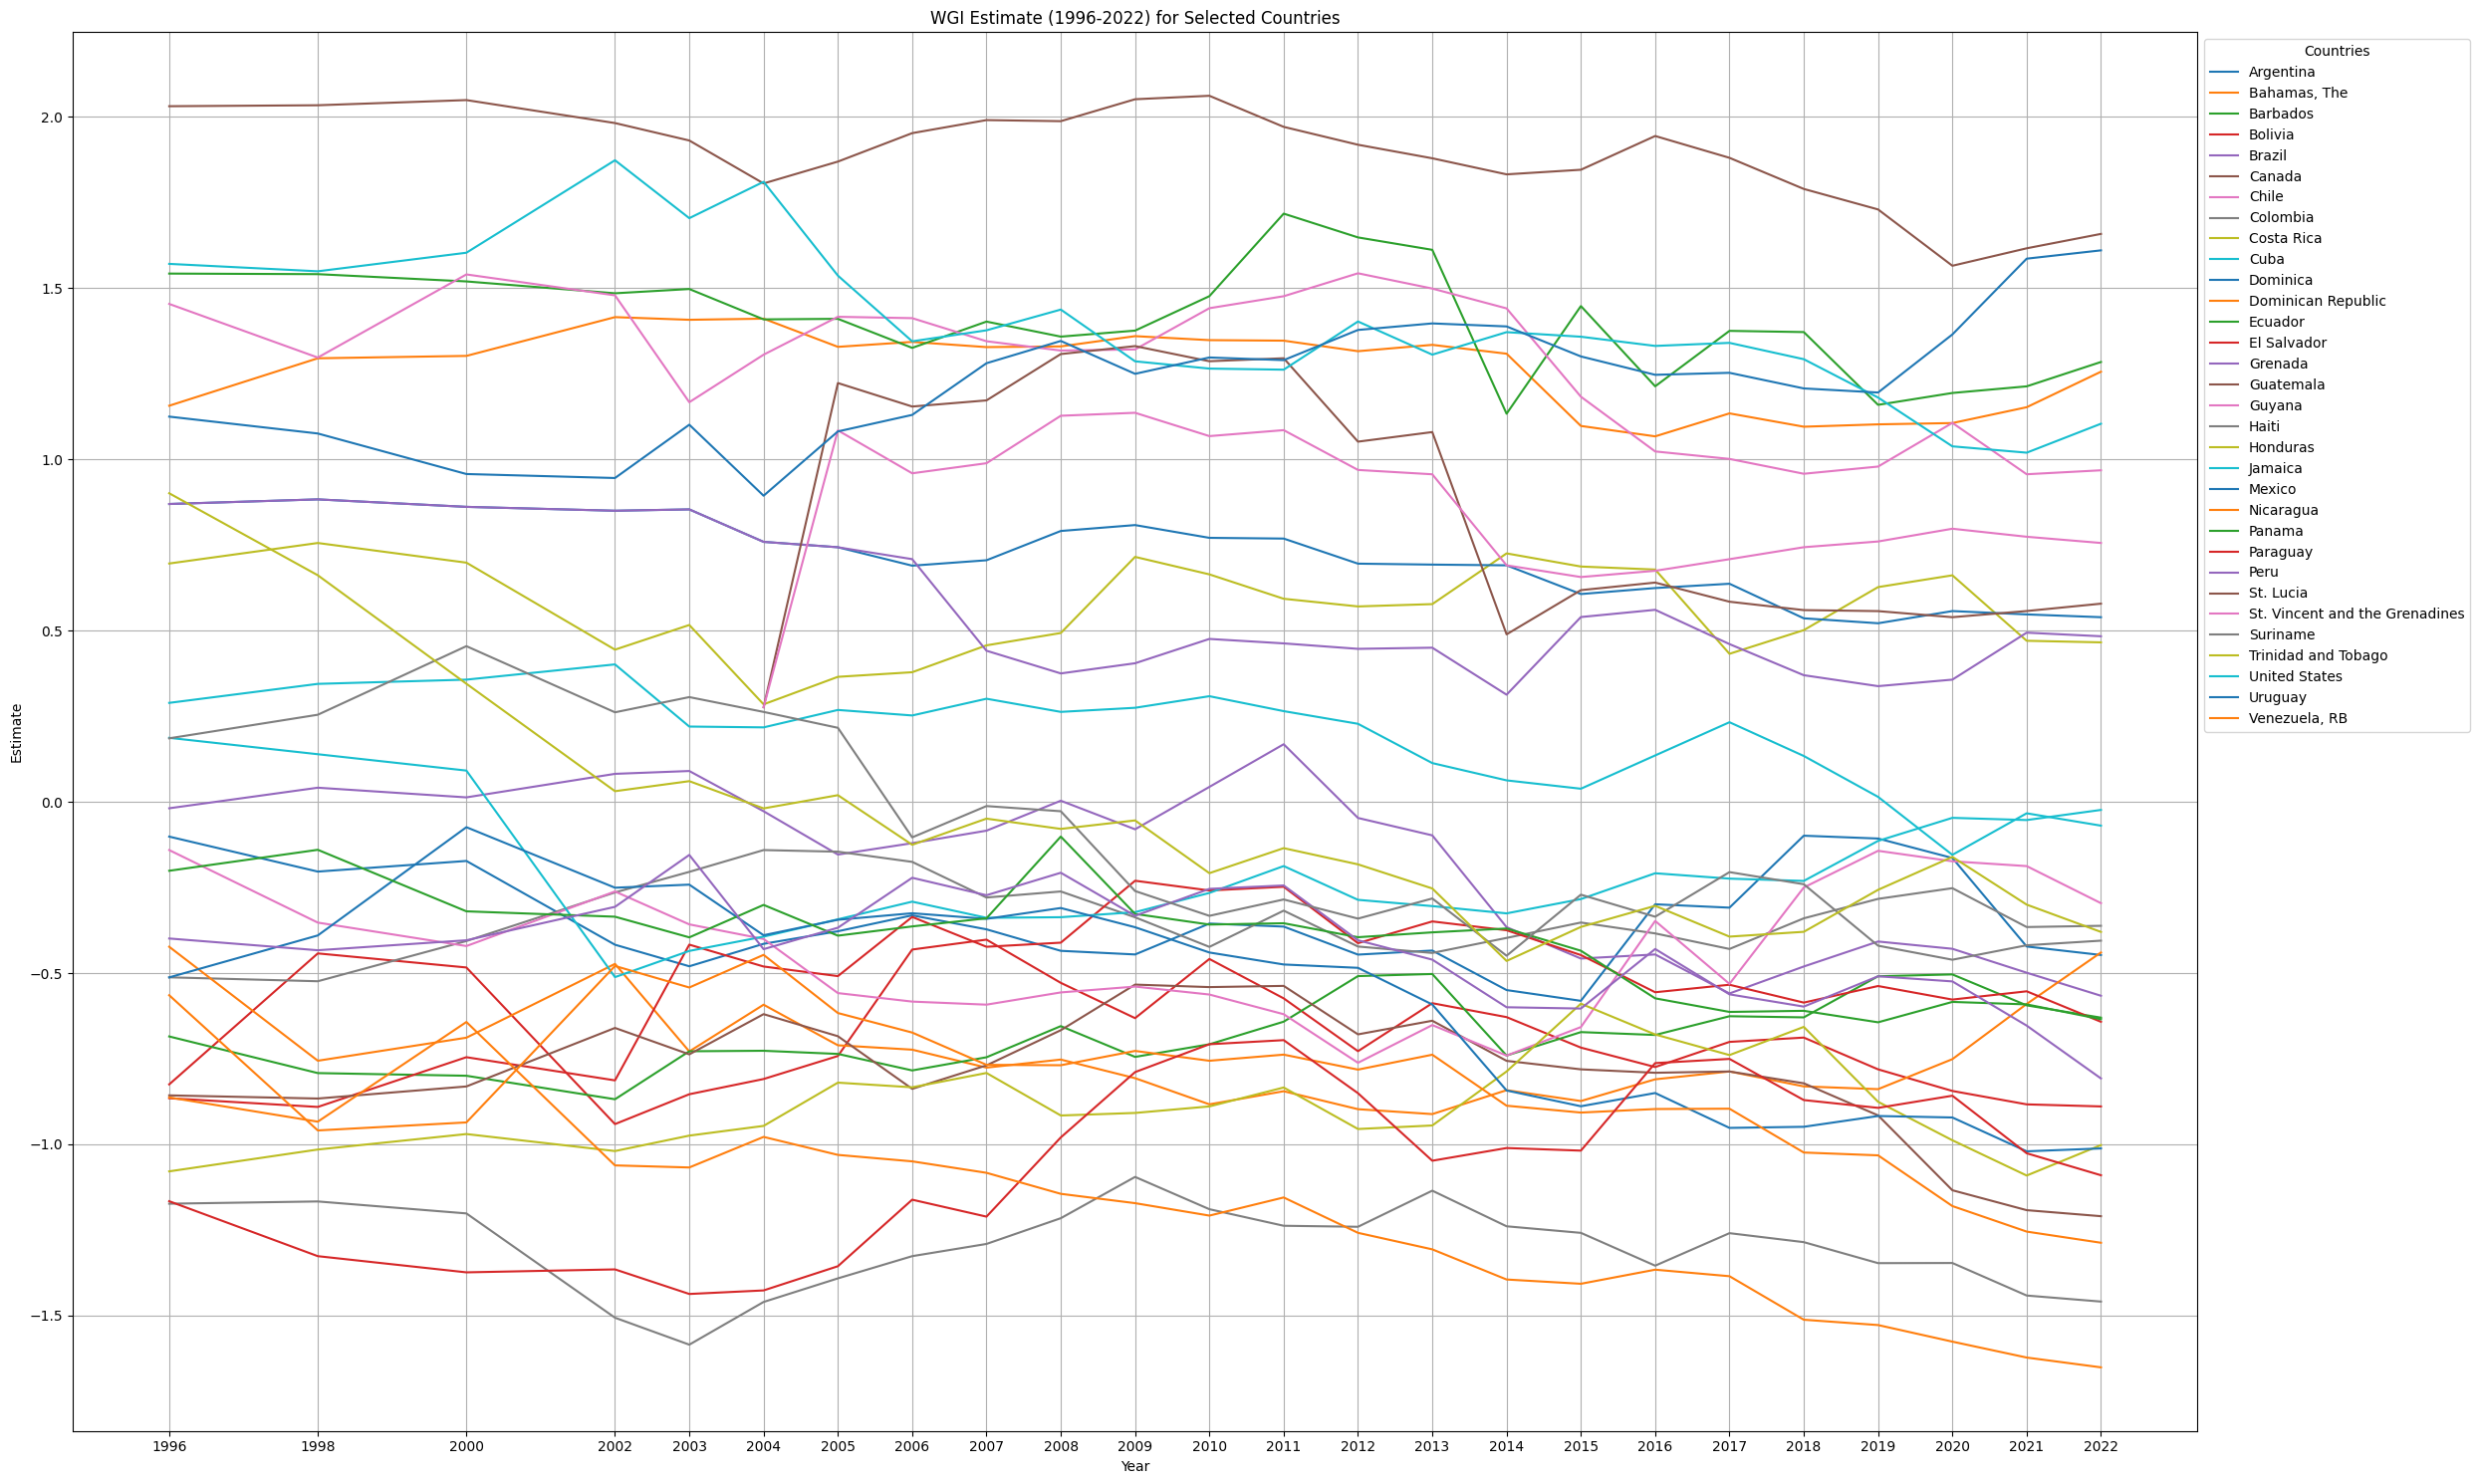

In [382]:
estimate_columns = DF_REGION.loc[:, DF_REGION.columns.get_level_values(1) == 'Estimate']
estimate_columns.index = DF_WGI.loc[estimate_columns.index, ('Basic', 'Country/Territory')]
years = estimate_columns.columns.get_level_values(0).unique().to_list()
plt.figure(figsize=(25, 15))

for country, country_data in estimate_columns.groupby(level=0):
    plt.plot(years, country_data.values.T, label=country)

plt.title('WGI Estimate (1996-2022) for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.legend(title="Countries", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()

### 7) Найдем страны с наибольшим и наименьшим значением WGI моего варианта региона за 2022 год (estimate). Запишем эти страны в один DataFrame DF_MINMAX с соответствующими отметками

In [383]:
estimate_2022 = (2022, 'Estimate')
max_value = DF_REGION[estimate_2022].max()
min_value = DF_REGION[estimate_2022].min()

min_countries = DF_REGION[DF_REGION[estimate_2022] == min_value][[('Basic', 'Country/Territory')]] # Страна с макс estimate
max_countries = DF_REGION[DF_REGION[estimate_2022] == max_value][[('Basic', 'Country/Territory')]] # Страна с мин estimate

DF_MINMAX = pd.concat([min_countries, max_countries]) # Соединяем
DF_MINMAX

,Basic
,Country/Territory
202,"Venezuela, RB"
35,Canada


### 8) Определим средние значения региона за каждый год в период с 1996 по 2022 (estimate) и сохраним их в Series S_MEANS только из средних значений для каждого года

In [384]:
estimate_columns = DF_REGION.loc[:, DF_REGION.columns.get_level_values(1) == 'Estimate'] # Интересуют только Estimate столбцы

S_MEANS = pd.Series([estimate_columns.loc[:,column].mean() for column in estimate_columns]) # Ищем средние значения и делаем Series
S_MEANS

0     0.083147
1     0.052232
2     0.072905
3     0.018983
4     0.012414
5     0.014755
6     0.063539
7     0.057995
8     0.057827
9     0.087125
10    0.081725
11    0.084752
12    0.100509
13    0.034041
14    0.026238
15   -0.072385
16   -0.068266
17   -0.053258
18   -0.068797
19   -0.078746
20   -0.090376
21   -0.104386
22   -0.137586
23   -0.143640
dtype: float64

### 9) Построим графики индекса WGI за 1996-2022 для стран своего региона и выделим страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразим среднее значение по региону и РФ.

In [385]:
estimate_columns = DF_REGION.loc[:, DF_REGION.columns.get_level_values(1) == 'Estimate']
estimate_columns.columns = estimate_columns.columns.droplevel(1)
estimate_columns.index = DF_REGION.loc[estimate_columns.index, ('Basic', 'Country/Territory')]
years = estimate_columns.columns.get_level_values(0).unique().to_list() # Список годов

countries_in_minmax = DF_MINMAX[('Basic', 'Country/Territory')].values # Страны из таблицы minmax
# Данные для РФ
estimate_russia = DF_WGI[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation'] 
estimate_russia = estimate_russia.loc[:, DF_WGI.columns.get_level_values(1) == 'Estimate']
estimate_russia.columns = estimate_russia.columns.droplevel(1) # Упрощаем многоуровневый заголовок
estimate_russia_series = estimate_russia.squeeze() # df в series
estimate_russia_series # Средние значения для России

1996   -1.053342
1998   -0.954374
2000   -0.943414
2002   -0.954848
2003   -0.783092
2004   -0.825626
2005   -0.847121
2006   -0.940848
2007   -1.017581
2008   -1.125229
2009   -1.141307
2010   -1.099215
2011   -1.074377
2012   -1.051572
2013   -1.020387
2014   -0.918525
2015   -0.973685
2016   -0.838143
2017   -0.914019
2018   -0.869118
2019   -0.821955
2020   -0.929948
2021   -0.920366
2022   -0.979387
Name: 163, dtype: float64

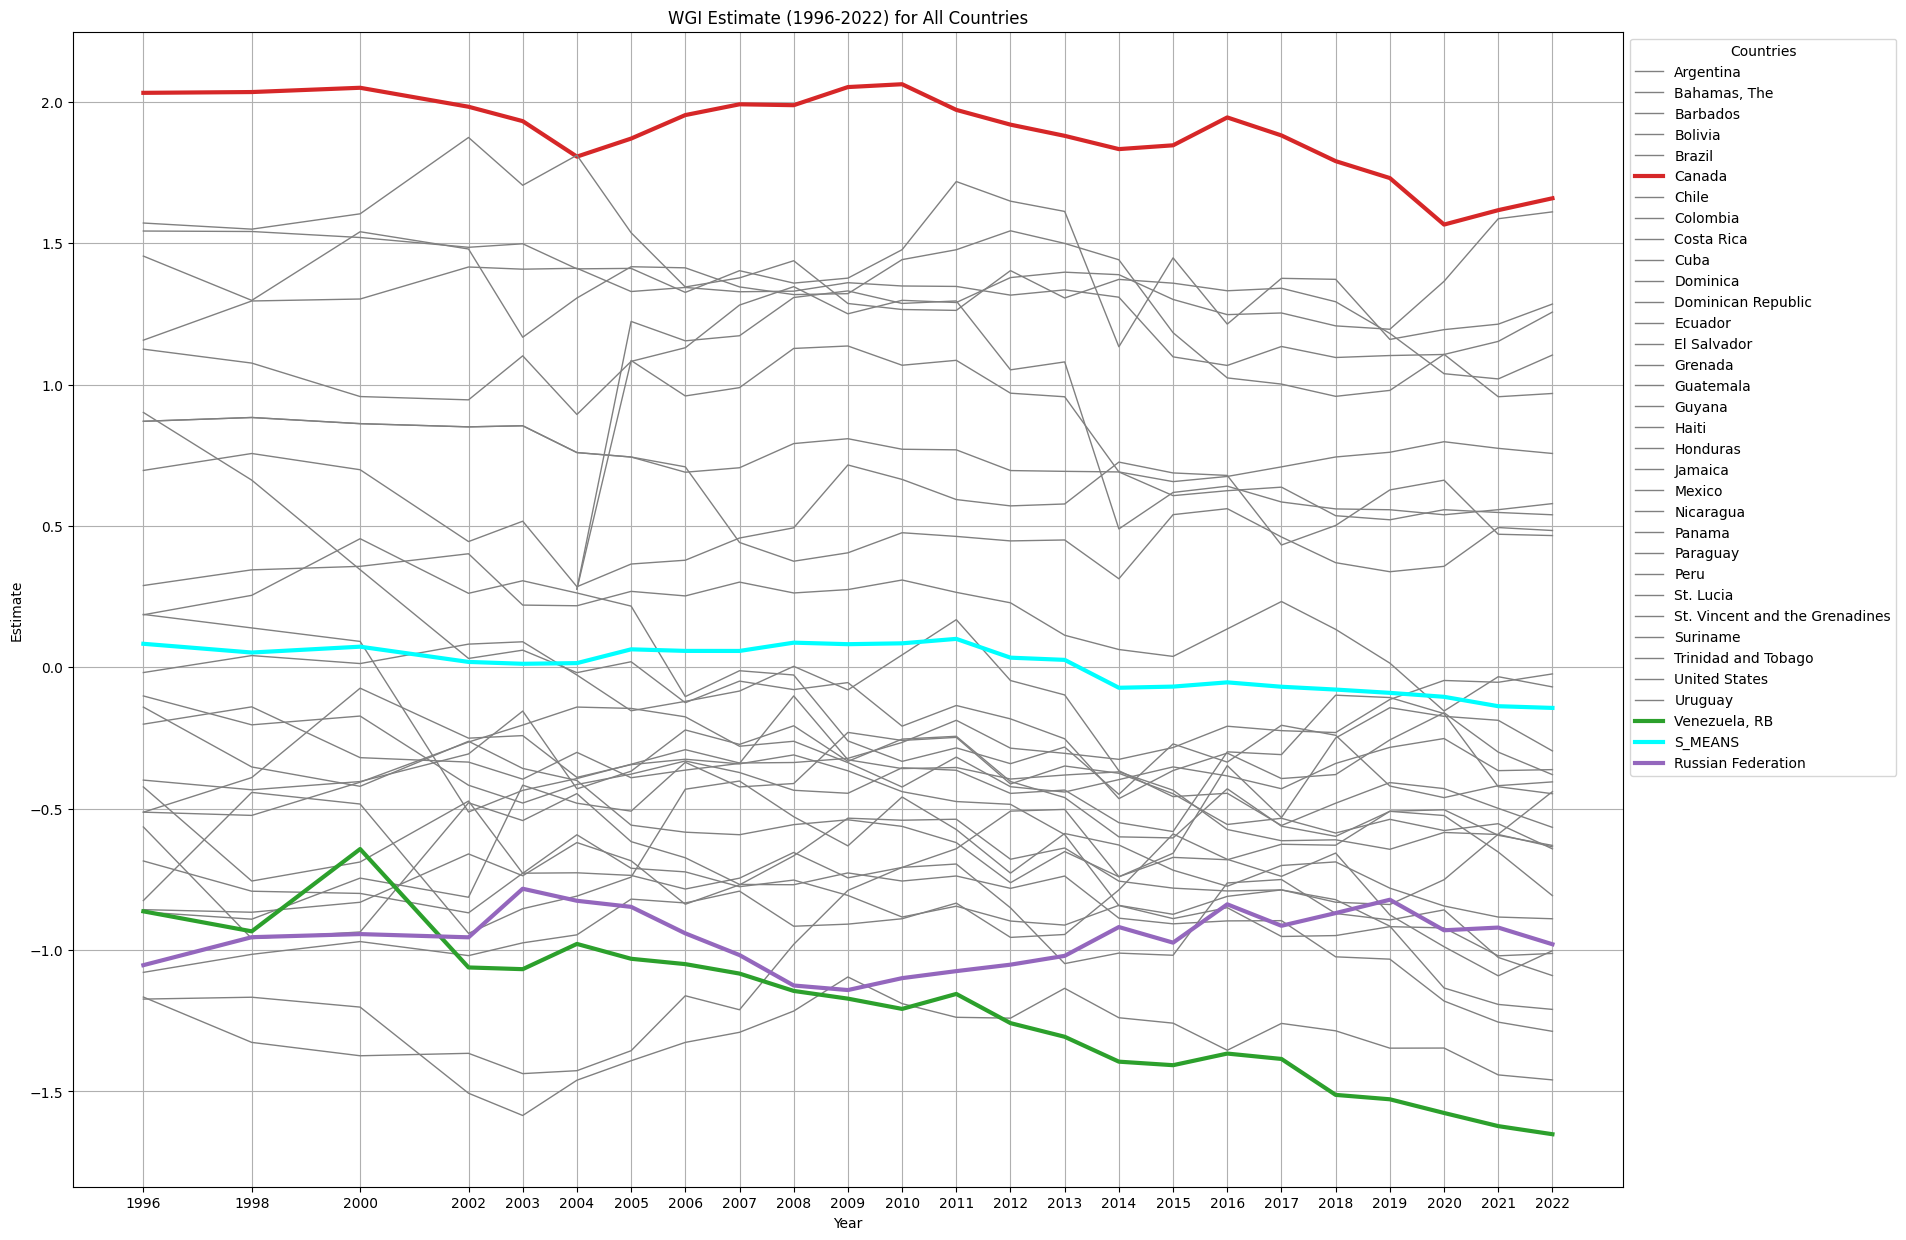

In [386]:
highlight_colors = ['tab:orange', 'tab:green', 'tab:red'] # Отсюда будет цвет линии выбираться

plt.figure(figsize=(20, 15))
for i, (country, country_data) in enumerate(estimate_columns.groupby(level=0)):
    if country in list(countries_in_minmax):
        plt.plot(years, country_data.values.T, label=country, color = highlight_colors[i % len(highlight_colors)], linewidth=3) # Страны из таблицы minmax имеют цветные линии
    else:
        plt.plot(years, country_data.values.T, label=country, color='gray', linewidth=1) # Обычные страны имеют серые линии

plt.plot(years, S_MEANS.values, label='S_MEANS', color='cyan', linewidth=3) # Линия с данными из S_MEANS
plt.plot(estimate_russia_series.index, estimate_russia_series.values, label='Russian Federation', color='tab:purple', linewidth=3) # Линия с данными по РФ

plt.title('WGI Estimate (1996-2022) for All Countries')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.legend(title="Countries", loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(years)
plt.show()

### 10) Определите, как изменилось значение показателя rank с 1996 по 2022 (rank)

Построим таблицу изменения Rank по годам:

In [387]:
RANK_CHANGE = DF_REGION.loc[:, DF_REGION.columns.get_level_values(1) == 'Rank'] # Интересует Rank
RANK_CHANGE.columns = RANK_CHANGE.columns.droplevel(1) # Упрощаем многоуровневый заголовок
RANK_CHANGE.index = DF_REGION.loc[RANK_CHANGE.index, ('Basic', 'Country/Territory')] # Меняем индекс на названия стран из DF_REGION
RANK_CHANGE

,1996,1998,2000,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
"(Basic, Country/Territory)",,,,,,,,,,,,,,,,,,,,,
Argentina,53.763439,50.267380,52.127659,41.798943,40.211639,39.901478,43.414635,43.414635,44.174759,39.805824,...,40.758293,35.576923,33.809525,45.714287,44.285713,53.809525,52.857143,47.619049,38.095238,36.320755
"Bahamas, The",83.870964,85.561501,86.170212,89.417992,89.947090,91.625618,89.268295,90.243904,89.320389,89.320389,...,88.625595,88.942307,81.904762,80.952377,82.857140,82.380951,82.380951,82.857140,83.809525,84.433960
Bolivia,25.268818,40.641712,40.425533,22.222221,23.280424,24.630543,24.390244,39.512196,39.805824,35.922329,...,35.071091,30.288462,26.666666,24.285715,26.666666,27.619047,25.714285,22.380953,20.476191,20.754717
Brazil,56.989246,56.149734,57.978722,58.730160,59.788361,54.679802,51.707317,53.170731,54.854370,57.766991,...,54.976303,44.230770,40.952381,39.523811,35.714287,38.095238,40.000000,37.619049,34.285713,32.075470
Barbados,90.860214,90.909088,90.957443,91.005295,91.005295,91.133003,90.731705,89.756096,91.262138,90.291260,...,91.469193,82.692307,90.000000,87.619049,89.047623,88.571426,83.333336,84.761902,84.761902,89.150940
Canada,96.236557,95.187164,95.212769,94.179893,94.179893,92.118225,93.658539,95.609756,95.145630,95.631065,...,95.260666,94.711540,95.238098,96.190475,95.714287,93.809525,92.857140,91.904762,92.380951,93.396225
Chile,90.322578,86.096260,91.489365,90.476189,83.597885,87.684731,91.219513,91.219513,89.805824,88.349518,...,90.047394,90.384613,87.142860,80.476189,81.428574,80.952377,80.476189,83.333336,80.952377,80.660378
Colombia,36.559139,36.363636,42.553192,46.560848,50.793652,52.216747,52.195122,52.195122,49.029125,49.514565,...,40.284359,42.788460,44.761906,41.904762,42.380951,43.333332,46.190475,45.714287,42.380951,41.037735
Costa Rica,75.268814,77.005348,74.468086,70.370369,72.486771,63.054188,65.365852,70.243904,71.844658,71.844658,...,70.616112,75.000000,74.285713,73.333336,64.285713,67.142860,71.904762,74.285713,66.666664,66.981133


Найдем разницу между средними показателями Rank между 2022 и 1996 годами:

In [388]:
rank_1996_mean = DF_REGION[(1996, 'Rank')].mean()
rank_2022_mean = DF_REGION[(2022, 'Rank')].mean()
rank_mean_difference = rank_2022_mean - rank_1996_mean
print(rank_mean_difference)

-7.686999362210436


### 11) Выведем таблицу для своего варианта (WGI - rank) и сохраним в таблицу RES_TABLE

In [389]:
rank_russia_1996 = DF_WGI.loc[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation', (1996, 'Rank')].iloc[0] # Rank РФ в 96 году
rank_russia_2022 = DF_WGI.loc[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation', (2022, 'Rank')].iloc[0] # Rank РФ в 22 году
rank_russia_difference = rank_russia_2022 - rank_russia_1996

In [390]:
rank_1996 = RANK_CHANGE[1996]
rank_2022 = RANK_CHANGE[2022]

country_max_2022 = rank_2022.idxmax() # Страна с макс Rank в 22 году
country_min_2022 = rank_2022.idxmin() # Страна с мин Rank в 22 году

rank_max_2022 = rank_2022.values.max() # Макс Rank в 22 году
rank_min_2022 = rank_2022.values.min() # Мин Rank в 22 году

rank_max_1996 = rank_1996[rank_1996.index == country_max_2022].values[0] # Rank в 96 году страны, у которой макс Rank в 22 году
rank_min_1996 = rank_1996[rank_1996.index == country_min_2022].values[0] # Rank в 96 году страны, у которой мин Rank в 22 году

rank_difference_max = rank_max_2022 - rank_max_1996
rank_difference_min = rank_min_2022 - rank_min_1996

In [391]:
# Создаем таблицу
RES_TABLE = pd.DataFrame({'Region': ['AME', 'AME', 'AME', 'ECA'],
                          'Country': ['-', country_max_2022, country_min_2022, "Russian Federation"],
                          'Rank 1996': [rank_1996_mean, rank_max_1996, rank_min_1996, rank_russia_1996],
                         'Rank 2022': [rank_2022_mean, rank_max_2022, rank_min_2022, rank_russia_2022],
                         'Difference': [rank_mean_difference, rank_difference_max, rank_difference_min, rank_russia_difference]},
                         index=['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'])

In [392]:
RES_TABLE

,Region,Country,Rank 1996,Rank 2022,Difference
mean_2022,AME,-,53.279570,45.592570,-7.686999
max_2022,AME,Canada,96.236557,93.396225,-2.840332
min_2022,AME,"Venezuela, RB",22.580645,1.886792,-20.693852
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


### 12) Отобразим диаграмму размаха (boxplot) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

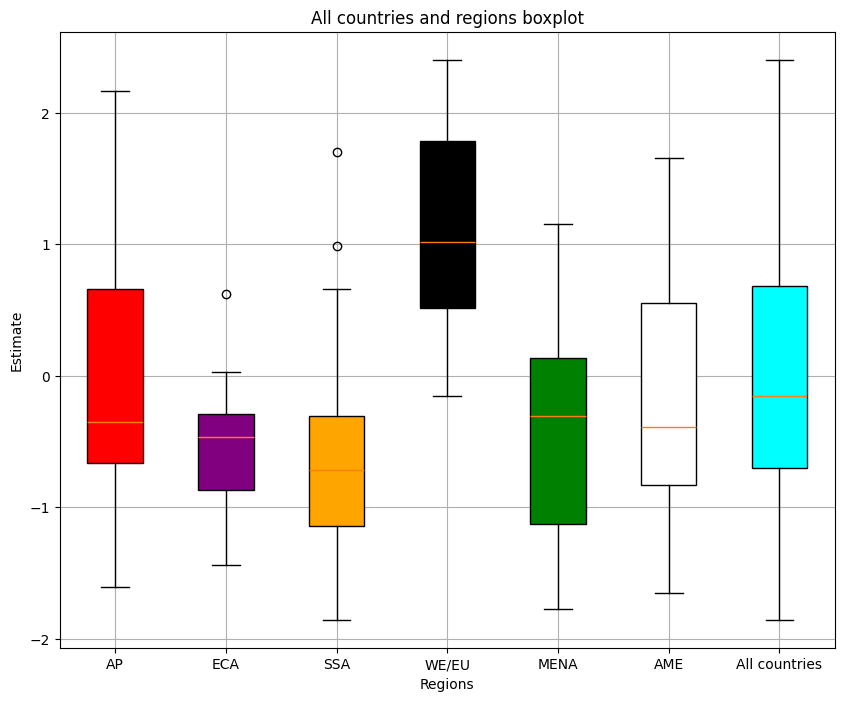

In [393]:
regions_dict = {
    "AP": {"label": "AP", "color": "red"},
    "ECA": {"label": "ECA", "color": "purple"},
    "SSA": {"label": "SSA", "color": "orange"},
    "WE/EU": {"label": "WE/EU", "color": "black"},
    "MENA": {"label": "MENA", "color": "green"},
    "AME": {"label": "AME", "color": "white"},
} # Словарь с регионами и данными для построения линий графика

data = [] # Значения Rank
labels = [] # label для графика
colors = [] # Цвет линии

def get_reg_data(reg_code): # Получаем данные региона
    country_codes = REGIONS_DF.loc[REGIONS_DF['Region'] == reg_code, 'Code']
    return DF_WGI[DF_WGI[('Basic', 'Code')].isin(country_codes)]

for reg_code, inf in regions_dict.items():
    reg_data = get_reg_data(reg_code) # Используем функцию
    rank_data = reg_data[(2022, 'Estimate')].dropna()
    data.append(rank_data)
    colors.append(inf["color"])
    labels.append(inf["label"])
    
all_countries_rank = DF_WGI[(2022, 'Estimate')].dropna() # Для всех стран
data.append(all_countries_rank)
labels.append("All countries")
colors.append("cyan")

fig, ax = plt.subplots(figsize=(10, 8))
boxplot = ax.boxplot(data, patch_artist=True)
for i, box in enumerate(boxplot['boxes']):
    box.set_facecolor(colors[i % len(colors)])

ax.grid(True)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(labels)
ax.set_title("All countries and regions boxplot")
ax.set_xlabel('Regions')
ax.set_ylabel('Estimate')
plt.show()

# Задача 2. Анализ рынка акций

### 1) Загрузим данные в один dataframe из всех файлов в папке /data/stock.Сохраним DataFrame в DF_COMPANIES.



In [394]:
import glob
import os
import seaborn as sns

In [395]:
# Функция для загрузки данных о ценах из всех csv файлов в папке
def load_stock_data(folder_path='data/stock/*.csv'): 
    dframes = [
        pd.read_csv(file)[['Date', 'Close']]
        .set_index('Date')
        .rename(columns={'Close': os.path.basename(file).replace('.csv', '')})
        for file in glob.glob(folder_path)
    ]
    
    return pd.concat(dframes, axis=1).sort_index(axis=1) # Объединяем df по столбцам и сортируем

DF_COMPANIES = load_stock_data() # Загружаем данные в df
DF_COMPANIES

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300
2022-06-01,136.720001,89.080002,366.059998,106.209999,42.639999,20.990000,41.669998,108.962997,53.139999,32.779999,...,151.589996,69.870003,18.160000,NaN,93.830002,27.450001,224.473328,83.809998,20.459999,8.6300
2022-07-01,162.509995,110.980003,410.119995,134.949997,45.369999,22.740000,48.630001,116.320000,57.400002,33.389999,...,181.630005,77.839996,19.480000,NaN,113.019997,25.780001,297.149994,84.800003,23.450001,7.8900
2022-08-01,157.220001,113.120003,373.440002,126.769997,44.720001,21.389999,44.130001,108.220001,59.869999,28.709999,...,150.940002,74.150002,23.040001,NaN,108.150002,25.719999,275.609985,69.580002,28.760000,7.1900
2022-09-01,138.199997,105.040001,275.200012,113.000000,40.000000,20.719999,36.810001,95.650002,51.220001,24.920000,...,121.389999,61.070000,23.299999,NaN,86.300003,27.309999,265.250000,69.139999,26.500000,5.5800


# 2) Рассчитаем корреляционную матрицу для всех акций и сохраним её в DF_CORR.

In [396]:
DF_CORR = DF_COMPANIES.corr()
DF_CORR

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,...,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,...,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311
DBX,0.740429,0.332740,0.816359,0.478171,0.496982,1.000000,-0.157363,0.669228,0.402517,-0.177013,...,0.519374,0.667833,0.710191,0.424923,0.525305,0.423136,0.037233,-0.113102,0.595928,0.382992
EBAY,0.115591,0.644140,0.180354,0.434078,0.494938,-0.157363,1.000000,0.375794,0.251066,0.744560,...,0.087027,-0.070414,-0.002757,0.338672,0.296858,-0.149330,0.434899,0.753732,0.085736,0.535223
GOOGL,0.806847,0.780440,0.915440,0.912332,0.600025,0.669228,0.375794,1.000000,0.535473,0.263251,...,0.715287,0.618983,0.640675,0.824313,0.821587,0.322718,0.326662,0.315410,0.737311,0.680658
GTLB,0.282373,0.460602,0.496556,0.690644,0.068856,0.402517,0.251066,0.535473,1.000000,0.094128,...,0.404702,0.138574,0.525458,0.855342,0.540113,0.103614,0.260908,0.310273,0.521399,0.453669
HPQ,0.067074,0.390153,0.081518,0.235247,0.214262,-0.177013,0.744560,0.263251,0.094128,1.000000,...,-0.160502,-0.260316,-0.285950,0.436406,0.005774,-0.443806,0.568231,0.728572,-0.180970,0.378627


### 3) Отобразим корреляционную матрицу в виде диаграммы.

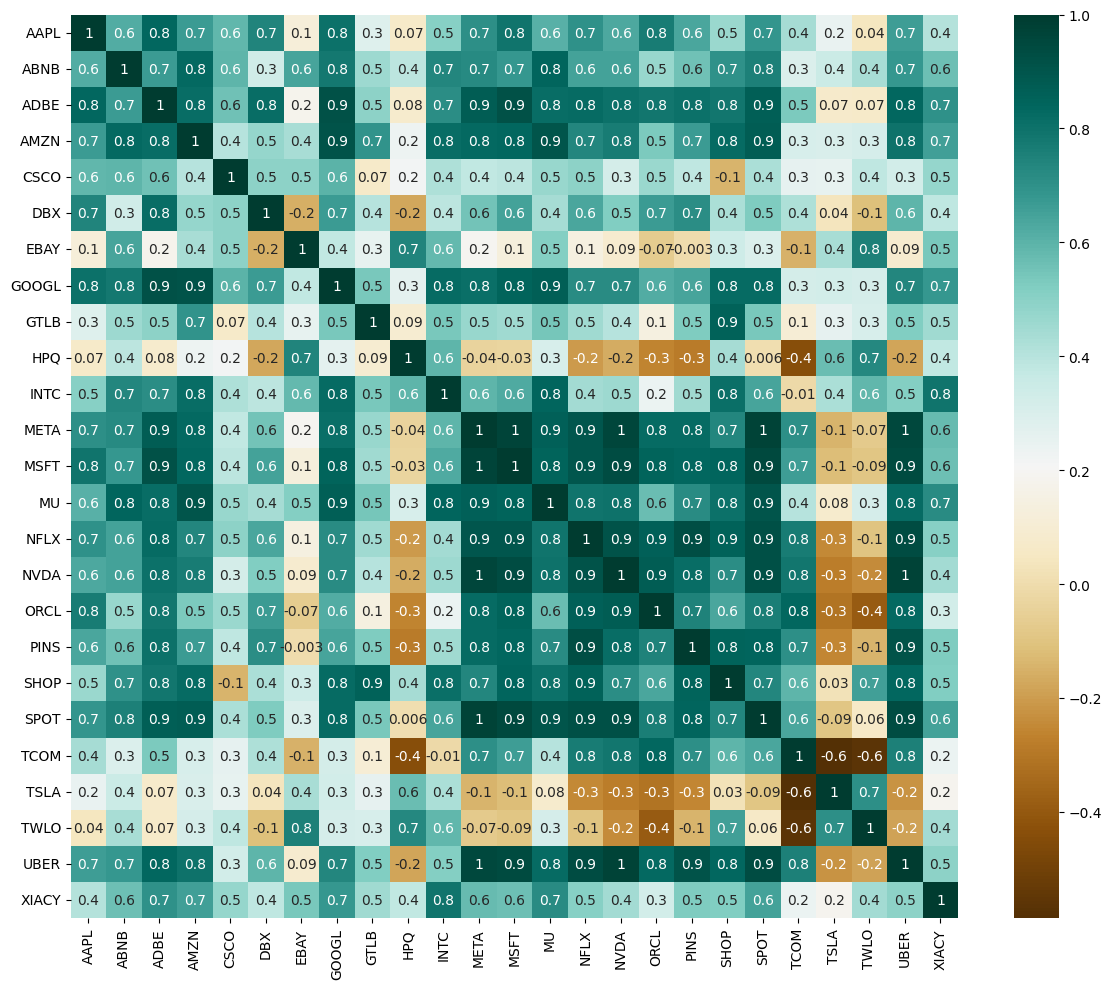

In [397]:
plt.figure(figsize=(12, 10))
sns.heatmap(DF_CORR, annot=True, fmt='.1g', cmap='BrBG')
plt.tight_layout()

### 4) В соответствии с вариантом определим:

Акцию с максимальной положительной корреляцией (max)

In [398]:
max_corr_to_uber_stock = DF_CORR['UBER'].nlargest(2).index[1]
max_corr_to_uber_stock

'NVDA'

Акцию с максимальной отрицательной корреляцией (min)

In [399]:
min_corr_to_uber_stock = DF_CORR['UBER'].idxmin()
min_corr_to_uber_stock

'TSLA'

Акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

In [400]:
closenone_corr_to_uber_stock = abs(DF_CORR['UBER']).idxmin()
closenone_corr_to_uber_stock

'EBAY'

In [401]:
LST_COMP_CORR = (max_corr_to_uber_stock, min_corr_to_uber_stock, closenone_corr_to_uber_stock)
LST_COMP_CORR = list(LST_COMP_CORR)
LST_COMP_CORR

['NVDA', 'TSLA', 'EBAY']

### 5) Построим диаграммы разброса (своя компания - Компания с min), (своя компания - Компания с max), (своя компания - Компания с none). По x расположим цену своей компании, по y - цену компании в паре.

In [402]:
# Получаем данные цен акций нашей и других компаний
uber_prices = DF_COMPANIES['UBER']
max_corr_stock_prices = DF_COMPANIES[max_corr_to_uber_stock]
min_corr_stock_prices = DF_COMPANIES[min_corr_to_uber_stock]
closenone_corr_stock_prices = DF_COMPANIES[closenone_corr_to_uber_stock]

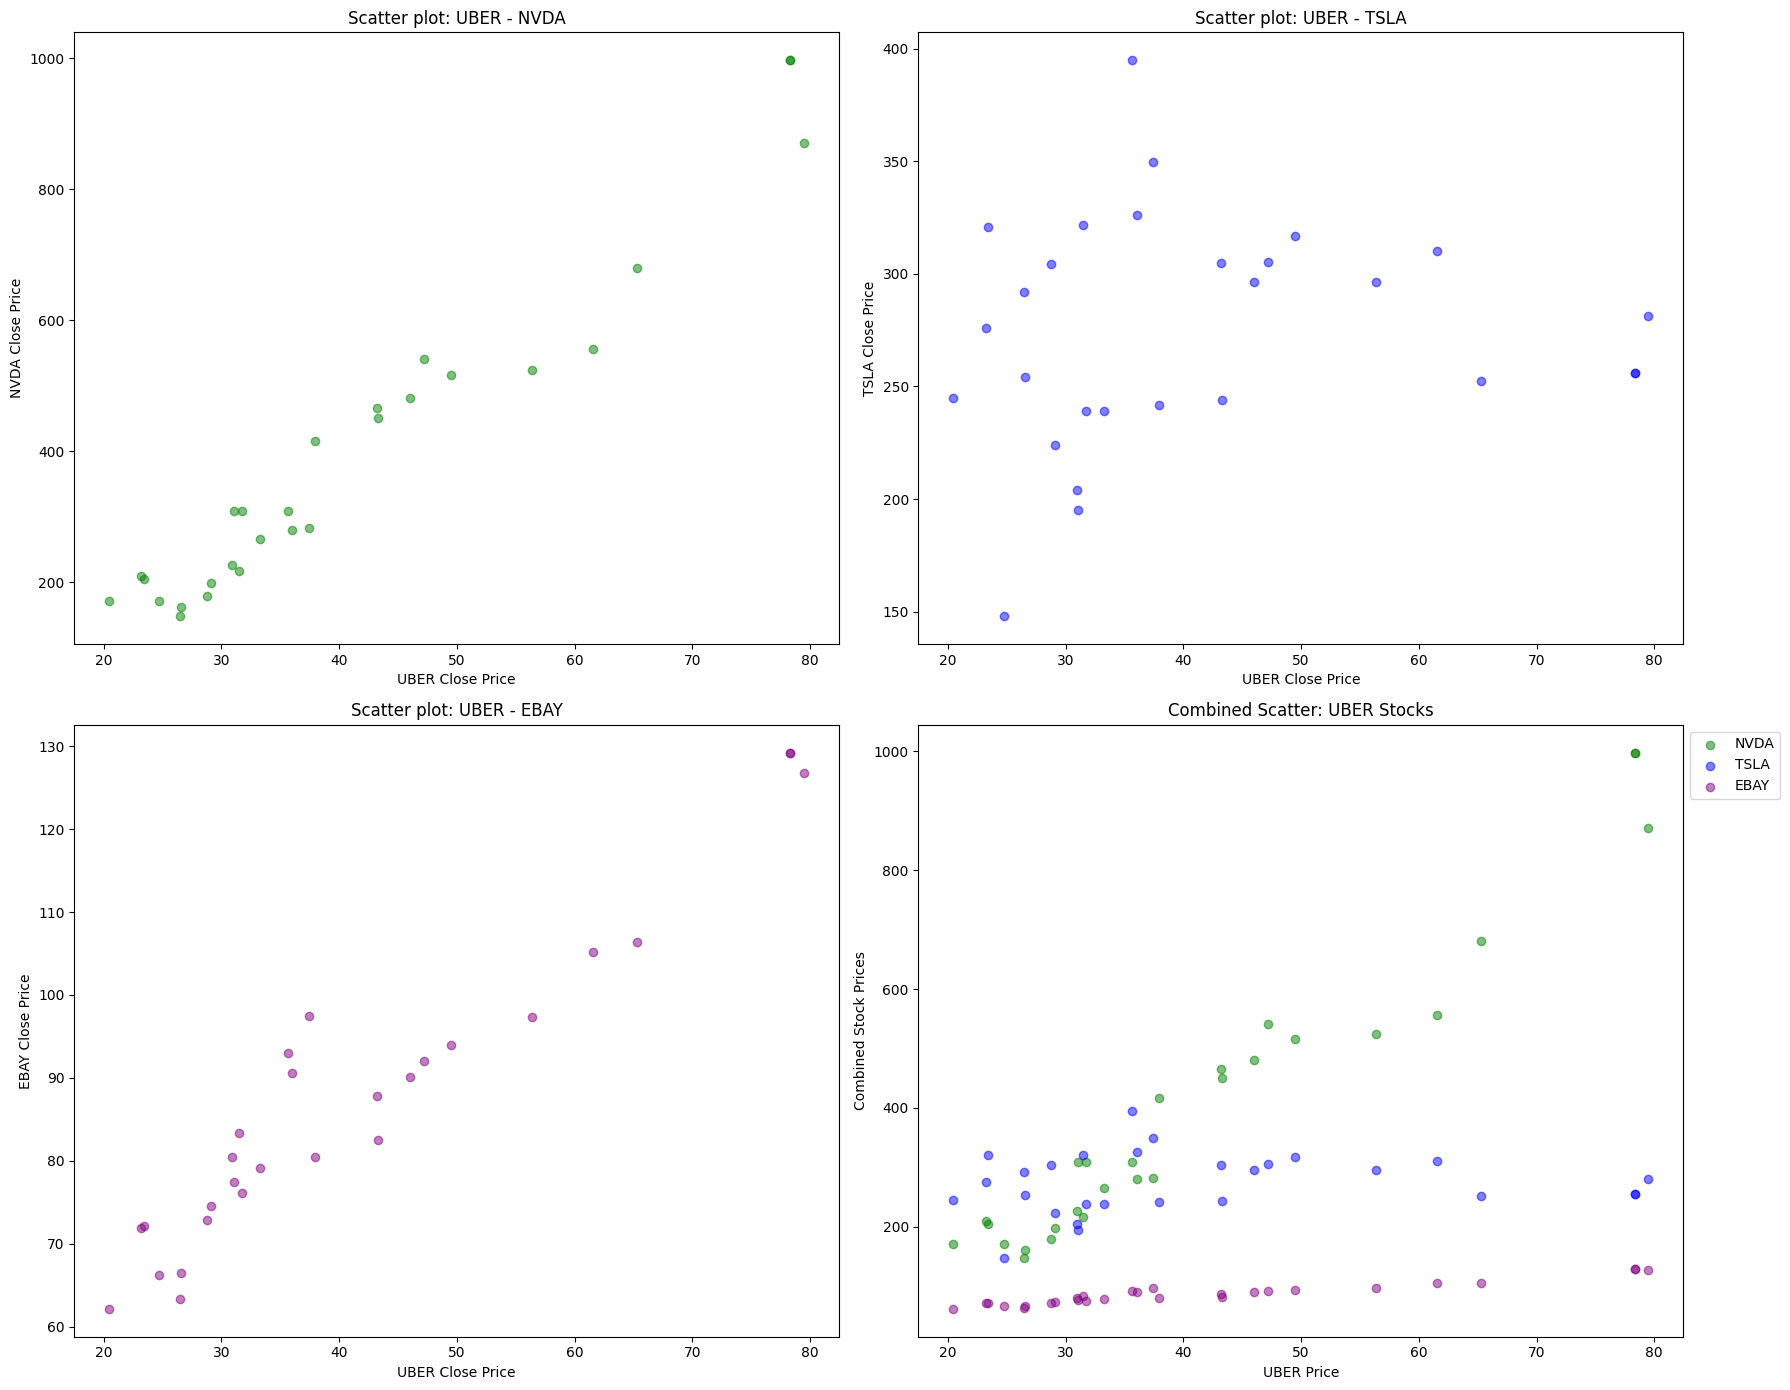

In [403]:
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

stocks = [(max_corr_to_uber_stock, max_corr_stock_prices, 'green'),
          (min_corr_to_uber_stock, min_corr_stock_prices, 'blue'),
          (closenone_corr_to_uber_stock, closenone_corr_stock_prices, 'purple')] # Данные акций для графиков

axs_flat = axs.ravel() # Для упрощения индексации

# Первые три scatter plot a
for i, (stock, stock_prices, color) in enumerate(stocks):
    axs_flat[i].scatter(
        uber_prices, 
        stock_prices + uber_prices, 
        color=color, 
        alpha=0.5
    )
    axs_flat[i].set_xlabel('UBER Close Price')
    axs_flat[i].set_ylabel(f'{stock} Close Price')
    axs_flat[i].set_title(f'Scatter plot: UBER - {stock}')

# Объединенный scatter plot
axs_flat[3].scatter(
    uber_prices, 
    max_corr_stock_prices + uber_prices, 
    color='green', 
    alpha=0.5, 
    label=max_corr_to_uber_stock
)
axs_flat[3].scatter(
    uber_prices, 
    min_corr_stock_prices + uber_prices, 
    color='blue', 
    alpha=0.5, 
    label=min_corr_to_uber_stock
)
axs_flat[3].scatter(
    uber_prices, 
    closenone_corr_stock_prices + uber_prices, 
    color='purple', 
    alpha=0.5, 
    label=closenone_corr_to_uber_stock
)
axs_flat[3].set_xlabel('UBER Price')
axs_flat[3].set_ylabel('Combined Stock Prices')
axs_flat[3].set_title('Combined Scatter: UBER Stocks')
axs_flat[3].legend(bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

### 6) Рассчитем среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц) и сохраним результат в S_MEANS_COMP. 

In [404]:
S_MEANS_COMP = DF_COMPANIES.mean(axis=1)
S_MEANS_COMP

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
dtype: float64

### 7) Построим графики для акций из пункта 4 и средней из пункта 6.

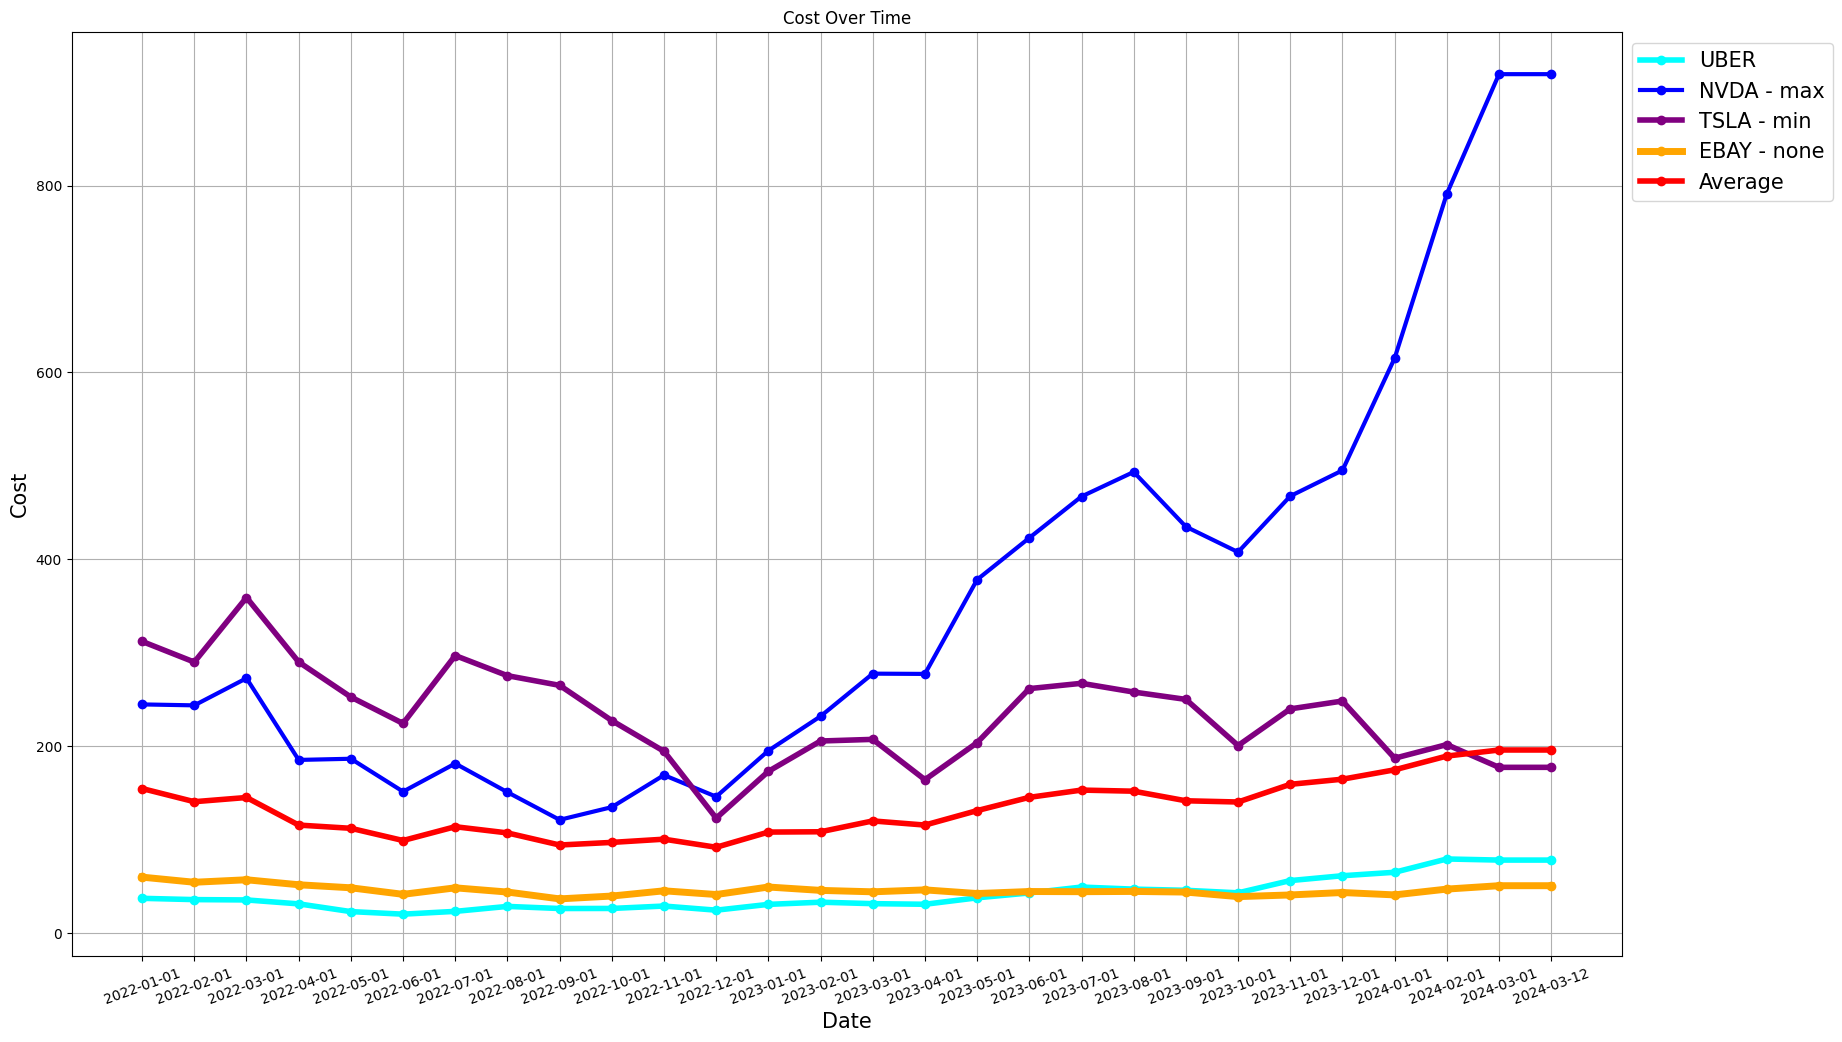

In [405]:
plt.figure(figsize=(20, 12))
plt.plot(uber_prices.T,"-o",color = "cyan",linewidth = 4, label = "UBER")
plt.plot(max_corr_stock_prices.T,"-o",color = "blue",linewidth = 3, label=f"{max_corr_to_uber_stock} - max")
plt.plot(min_corr_stock_prices.T, "-o", color = "purple", linewidth = 4, label = f"{min_corr_to_uber_stock} - min")
plt.plot(closenone_corr_stock_prices.T, "-o", color = "orange", linewidth = 5, label = f"{closenone_corr_to_uber_stock} - none")
plt.plot(S_MEANS_COMP.T, "-o", color = "red", linewidth = 4, label = "Average")

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1,1), fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Cost',fontsize = 15)
plt.title('Cost Over Time')
plt.grid(True)
plt.show()

Акции UBER имеют низкую стоимость по сравнению с другими, а также цена слабо колеблется.

### Вывод:

Были получены навыки работы с библиотеками **pandas**, **matplotlib**, **seaborn** и некоторыми другими. Я улучшил навыки по работе с **DataFrame**, проводя различные операции над ними, также получил опыт анализа данных по таблицам и графикам.